# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [5]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Extract all rows of data
rows = []
for x in browser.find_by_css('tr'):
    rows.append(x.text.split(' '))

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars = pd.DataFrame(rows)
mars.head()
#set column names
mars.columns = mars[:1].values[0]
mars.head()
#remove first row & start index at 0
mars = mars.drop([0])
mars = mars.reset_index(drop = True)
#scraped_data.drop(0)
mars.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
mars.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
# Change data types for data analysis
mars['terrestrial_date'] = pd.to_datetime(mars['terrestrial_date'])
mars[['sol', 'ls', 'month']] = mars[[ 'sol', 'ls', 'month']].astype("int64")
mars[['min_temp', 'pressure']]= mars[['min_temp', 'pressure']].astype(float)

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
month = mars['month'].max()
month

12

In [19]:
# 2. How many Martian days' worth of data are there?
days = len(mars['sol'].unique())
days

1867

In [20]:
# 3. What is the average low temperature by month?
#We can perform a groupby in order to print everage Temperature values
mmonth = mars.groupby(['month'])
mtemp = mmonth["min_temp"].mean()
mtemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

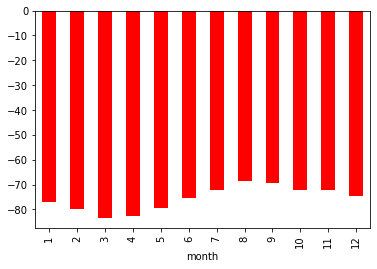

In [22]:
mtemp.plot(kind = "bar",color = "red")

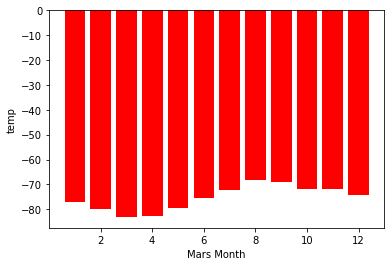

In [26]:
#Group by average temperature per month and print the max and min values

avg_weather = mars.groupby("month").mean()

cold = avg_weather['min_temp'].idxmin()

cold

warm = avg_weather['min_temp'].idxmax()

warm

x = avg_weather.index
height = avg_weather['min_temp']
plt.xlabel('Mars Month')
plt.ylabel('temp')
plt.bar(x=x, height=height,color = "red")
plt.show()

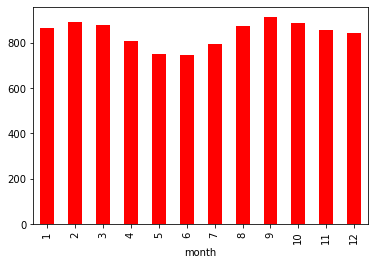

In [30]:
# Plot the average pressure by month
mpres = mmonth["pressure"].mean()
mpres

mpres.plot(kind = "bar",color='red')

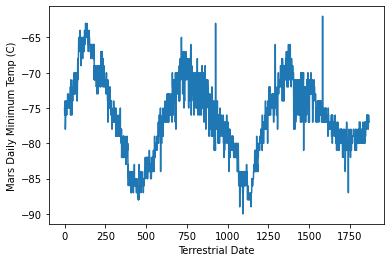

In [34]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars["min_temp"].plot()
plt.xlabel('Terrestrial Date')
plt.ylabel('Mars Daily Minimum Temp (C)')

plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
mars.to_csv('mars_weather.csv', index=False)

In [36]:
browser.quit()